In [31]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.cm as cm
import itertools
#import plotly.plotly as py
from IPython.display import display, HTML
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [32]:
df = pd.read_csv('countries of the world.csv')
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [33]:
print(df.keys())

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')


In [34]:
 df = df.rename(columns={
     "Country":"country",
     "Region":"region",
     "Population":"population",
     "Area (sq. mi.)":"area",
     "Pop. Density (per sq. mi.)":"pop_density",
     "Coastline (coast/area ratio)":"coastline",
     "Net migration":"net_migration",
     "Infant mortality (per 1000 births)":"infant_mortality",
     "GDP ($ per capita)": "gdp_capita",
     "Literacy (%)":"literacy",
     "Phones (per 1000)":"phones_per_1000",
     "Arable (%)":"arable",
     "Crops (%)":"crops",
     "Other (%)":"other",
     "Climate":"climate",
     "Birthrate":"birth_rate",
     "Deathrate":"death_rate",
     "Agriculture":"agriculture",
     "Industry":"industry",
     "Service":"service"
     
 })
df.head()

,country,region,population,area,pop_density,coastline,net_migration,infant_mortality,gdp_capita,literacy,phones_per_1000,arable,crops,other,climate,birth_rate,death_rate,agriculture,industry,service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [35]:
df.dtypes

country              object
region               object
population            int64
area                  int64
pop_density          object
coastline            object
net_migration        object
infant_mortality     object
gdp_capita          float64
literacy             object
phones_per_1000      object
arable               object
crops                object
other                object
climate              object
birth_rate           object
death_rate           object
agriculture          object
industry             object
service              object
dtype: object

In [36]:
df.fillna(0,inplace=True)

for column in df.columns:
    try:
        df[column] = df[column].str.replace(',','.').astype(float)
    except:
        print('')

In [37]:
df.dtypes

country              object
region               object
population            int64
area                  int64
pop_density         float64
coastline           float64
net_migration       float64
infant_mortality    float64
gdp_capita          float64
literacy            float64
phones_per_1000     float64
arable              float64
crops               float64
other               float64
climate             float64
birth_rate          float64
death_rate          float64
agriculture         float64
industry            float64
service             float64
dtype: object

In [38]:
df.region.value_counts()

SUB-SAHARAN AFRICA                     51
LATIN AMER. & CARIB                    45
ASIA (EX. NEAR EAST)                   28
WESTERN EUROPE                         28
OCEANIA                                21
NEAR EAST                              16
C.W. OF IND. STATES                    12
EASTERN EUROPE                         12
NORTHERN AFRICA                         6
NORTHERN AMERICA                        5
BALTICS                                 3
Name: region, dtype: int64

In [79]:
df1 = df.fillna(0)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
country             227 non-null object
region              227 non-null object
population          227 non-null int64
area                227 non-null int64
pop_density         227 non-null float64
coastline           227 non-null float64
net_migration       227 non-null float64
infant_mortality    227 non-null float64
gdp_capita          227 non-null float64
literacy            227 non-null float64
phones_per_1000     227 non-null float64
arable              227 non-null float64
crops               227 non-null float64
other               227 non-null float64
climate             227 non-null float64
birth_rate          227 non-null float64
death_rate          227 non-null float64
agriculture         227 non-null float64
industry            227 non-null float64
service             227 non-null float64
dtypes: float64(16), int64(2), object(2)
memory usage: 35.5+ KB


In [80]:
df1.describe()

,population,area,pop_density,coastline,net_migration,infant_mortality,gdp_capita,literacy,phones_per_1000,arable,crops,other,climate,birth_rate,death_rate,agriculture,industry,service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.037621,35.037709,9647.136564,76.269604,231.901762,13.675551,4.524009,80.919031,1.931718,21.822467,9.078502,0.140877,0.262784,0.527930
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.856712,35.388330,10047.485847,29.346066,228.099042,13.046722,8.335358,17.795561,0.918569,11.387139,5.093580,0.146730,0.151741,0.213272
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.905000,7.825000,1900.000000,62.950000,33.050000,3.095000,0.190000,70.875000,1.500000,12.350000,5.755000,0.030500,0.170000,0.404500
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,20.910000,5500.000000,90.300000,164.100000,10.380000,1.010000,85.380000,2.000000,18.710000,7.820000,0.090000,0.259000,0.559000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.980000,55.335000,15700.000000,97.800000,382.900000,20.000000,4.435000,95.230000,2.250000,29.770000,10.580000,0.211000,0.335000,0.671500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [81]:
print(df1.sort_values("population",ascending=False)['country'].head(10))
print("----------------------------------")
print(df1.sort_values("population",ascending=True)['country'].head(10))

42             China 
94             India 
214    United States 
95         Indonesia 
27            Brazil 
156         Pakistan 
16        Bangladesh 
169           Russia 
152          Nigeria 
103            Japan 
Name: country, dtype: object
----------------------------------
174    St Pierre & Miquelon 
171            Saint Helena 
140              Montserrat 
209                  Tuvalu 
144                   Nauru 
6                  Anguilla 
221       Wallis and Futuna 
157                   Palau 
208       Turks & Caicos Is 
47             Cook Islands 
Name: country, dtype: object


In [82]:
#Population per country
colorscales = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]]

data = dict(
        type='choropleth',
        locations = df1['country'],
        locationmode = 'country names', z = df1['population'],
        text = df1['country'], colorbar = {'title':'population'},
        colorscale = colorscales, reversescale = True)

layout = dict(title='Population per country',
            geo = dict(showframe=False,projection=dict(type='natural earth')))

choromap = go.Figure(data = [data],layout = layout)
py.iplot(choromap,validate=False)


In [112]:
#Population per country
colorscales = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]]

data = dict(
        type='choropleth',
        locations = df1['country'],
        locationmode = 'country names', z = df1['gdp_capita'],
        text = df1['country'], colorbar = {'title':'gdp_capita'},
        colorscale = colorscales, reversescale = True)

layout = dict(title='gdp_per_capita per country',
            geo = dict(showframe=False,projection=dict(type='natural earth')))

choromap = go.Figure(data = [data],layout = layout)
py.iplot(choromap,validate=False)


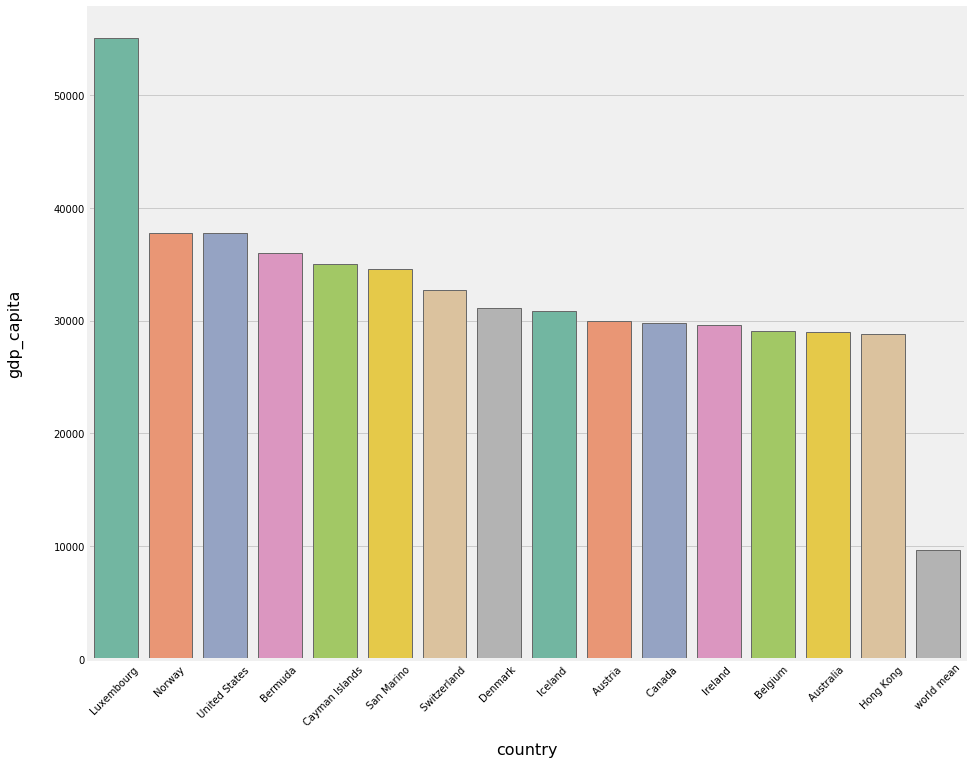

In [116]:
fig, ax = plt.subplots(figsize=(14,12))
top_gdp_countries = df1.sort_values('gdp_capita', ascending = False).head(15)
mean = pd.DataFrame({'country':['world mean'], 'gdp_capita':[df1['gdp_capita'].mean()]})
gdps = pd.concat([top_gdp_countries[['country','gdp_capita']],mean],ignore_index=True)

sns.barplot(x='country',y='gdp_capita',data=gdps,palette='Set2')
ax.set_xlabel(ax.get_xlabel(),labelpad=15)
ax.set_ylabel(ax.get_ylabel(),labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=45)
plt.show()

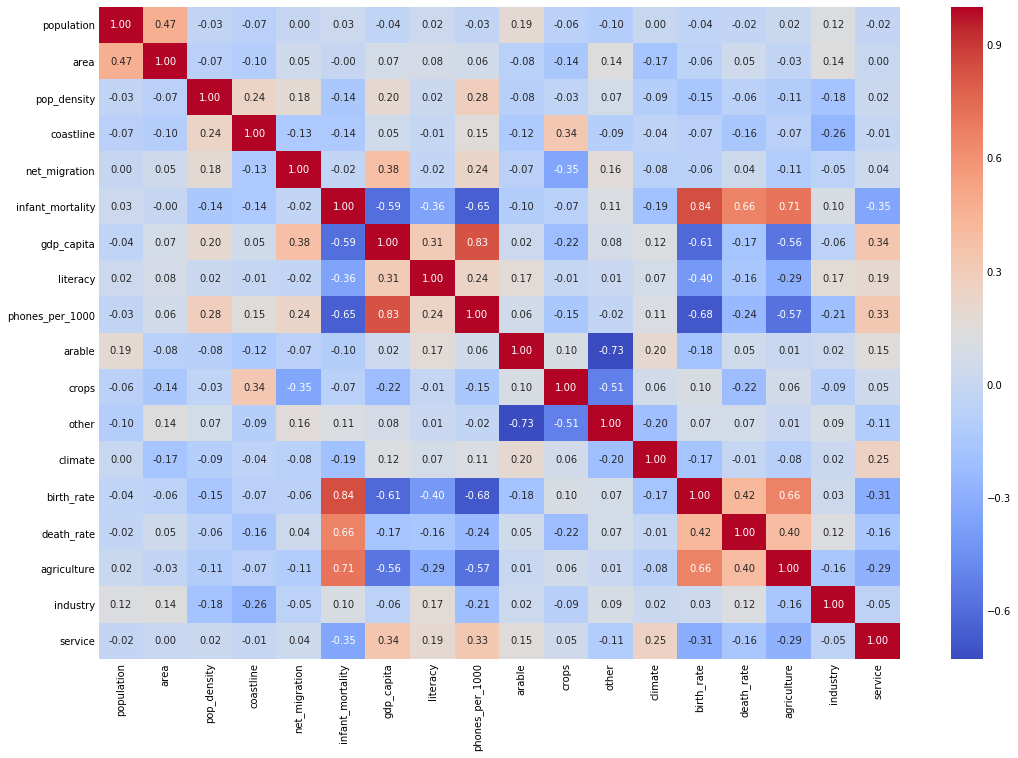

In [83]:
#ax = sns.heatmap(df.corr(), square = True, cmap ='RdYlGn')
#fig = ax.get_figure()
#fig.savefig('HeatMap.png')

plt.figure(figsize=(16,12))
sns.heatmap(data=df1.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

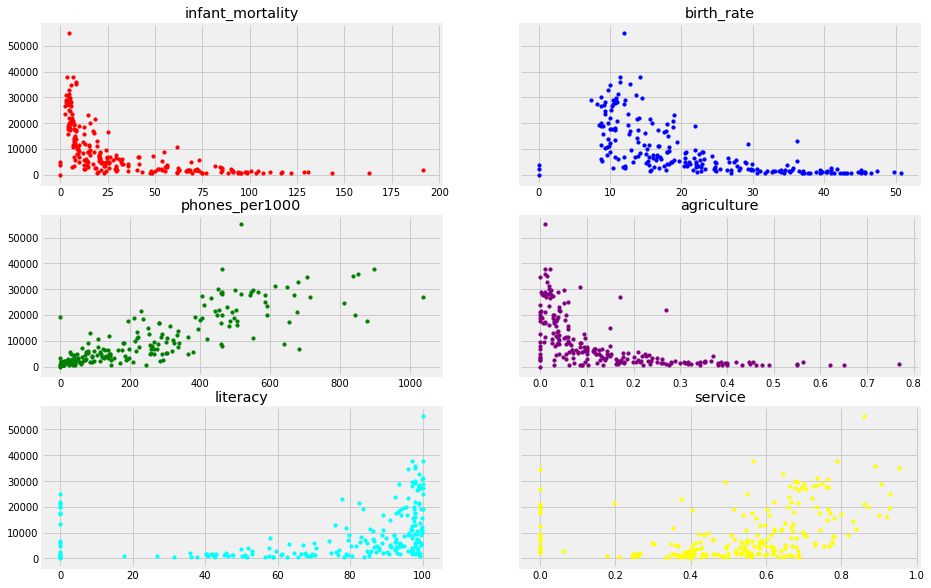

In [110]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,sharey=True, figsize=(14,10))


ax1.scatter(x='infant_mortality',y='gdp_capita',s = 10, data=df1,color='red')
ax2.scatter(x='birth_rate',y='gdp_capita',s = 10,data=df1,color='blue')
ax3.scatter(x='phones_per_1000',y='gdp_capita',s = 10,data=df1,color='green')
ax4.scatter(x='agriculture',y='gdp_capita',s = 10,data=df1,color='purple')
ax5.scatter(x='literacy',y='gdp_capita',s = 10, data=df1,color='cyan')
ax6.scatter(x='service',y='gdp_capita',s = 10, data=df1,color='yellow')

ax1.set_title('infant_mortality')
ax2.set_title('birth_rate')
ax3.set_title('phones_per1000')
ax4.set_title('agriculture')
ax5.set_title('literacy')
ax6.set_title('service')

plt.show()

In [146]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [134]:
LE = LabelEncoder()

df1['region_label'] = LE.fit_transform(df1['region'])
df1['climate_label'] = LE.fit_transform(df1['climate'])
df1.head()

,country,region,population,area,pop_density,coastline,net_migration,infant_mortality,gdp_capita,literacy,...,crops,other,climate,birth_rate,death_rate,agriculture,industry,service,region_label,climate_label
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,0,1
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,3,5
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,6,1
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000,8,3
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000,10,5


In [143]:
train, test = train_test_split(df1,test_size=0.3,shuffle=True)
training_feat = ['population','area','pop_density','coastline','net_migration','infant_mortality',
                 'literacy','phones_per_1000','arable','crops','other','birth_rate','death_rate','agriculture',
                 'industry','service','region_label','climate_label']
target = 'gdp_capita'

train_X = train[training_feat]
train_Y = train[target]

test_X = test[training_feat]
test_Y = test[target]

In [171]:
model = LinearRegression()

model.fit(train_X,train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)

train_pred_Y = pd.Series(train_pred_Y.clip(0,train_pred_Y.max()),index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0,test_pred_y.max()),index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y,train_Y))
msle_train = mean_squared_log_error(train_pred_Y,train_Y)

rmse_test = np.sqrt(mean_squared_error(test_pred_Y,test_Y))
msle_test = mean_squared_log_error(test_pred_Y,test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 3770.6710479736603 msle_train: 5.653116847275198
rmse_test: 5986.657957900099 msle_test: 7.524191025018984


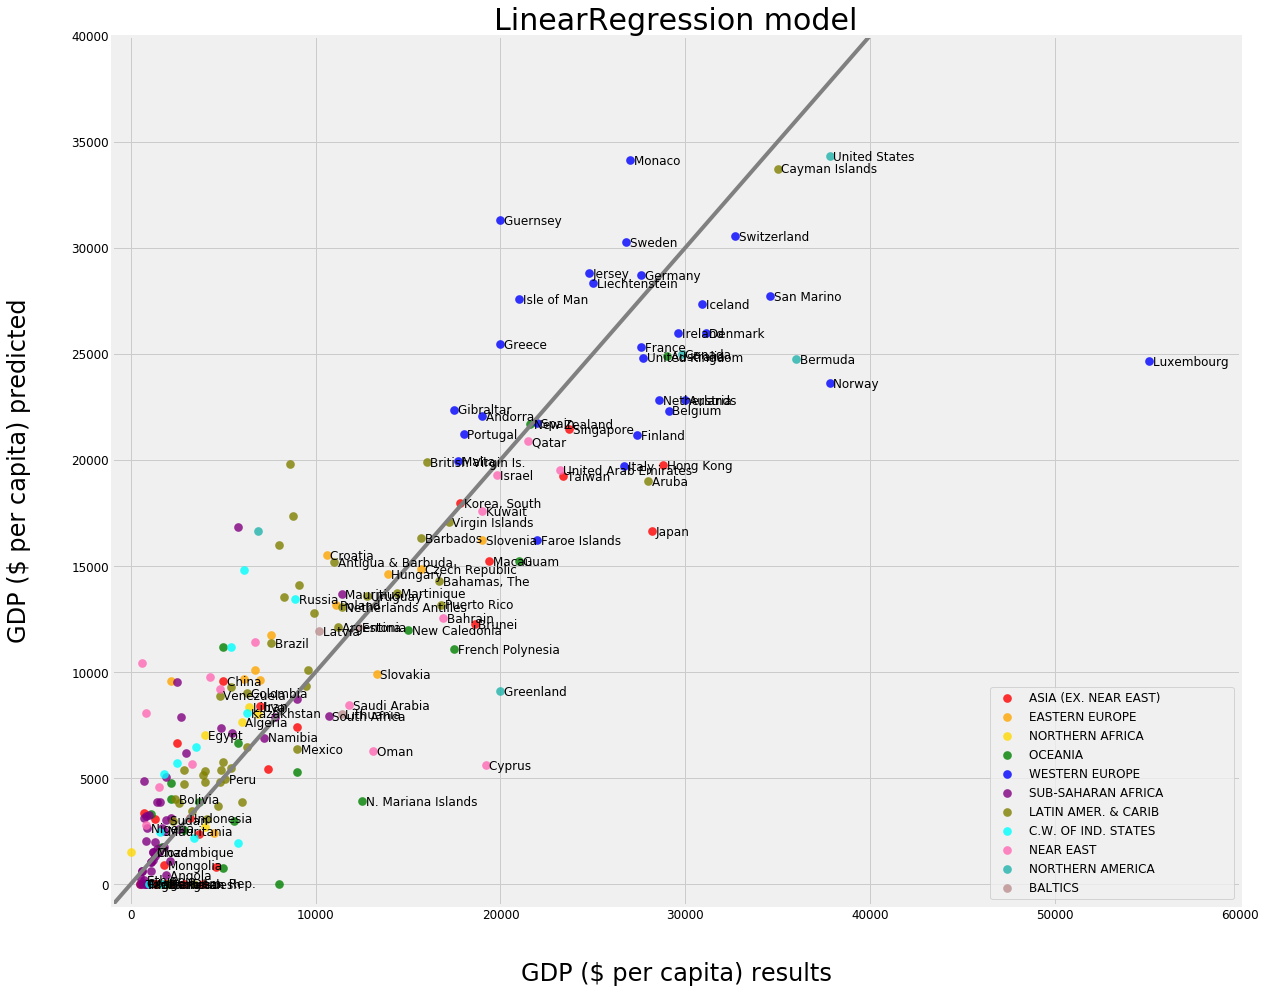

In [172]:
plt.figure(figsize=(18,16))

train_test_Y = train_Y.append(test_Y)
train_test_pred_Y = train_pred_Y.append(test_pred_Y)

data_shuffle = df1.loc[train_test_Y.index]
label = data_shuffle['country']

colors = {'ASIA (EX. NEAR EAST)         ':'red',
          'EASTERN EUROPE                     ':'orange',
          'NORTHERN AFRICA                    ':'gold',
          'OCEANIA                            ':'green',
          'WESTERN EUROPE                     ':'blue',
          'SUB-SAHARAN AFRICA                 ':'purple',
          'LATIN AMER. & CARIB    ':'olive',
          'C.W. OF IND. STATES ':'cyan',
          'NEAR EAST                          ':'hotpink',
          'NORTHERN AMERICA                   ':'lightseagreen',
          'BALTICS                            ':'rosybrown'}

for region, color in colors.items():
    X = train_test_Y.loc[data_shuffle['region']==region]
    Y = train_test_pred_Y.loc[data_shuffle['region'] == region]
    ax = sns.regplot(x=X,y=Y,marker='.',fit_reg=False,color=color,scatter_kws={'s':300,'linewidths':0},label=region)

plt.legend(loc=4,prop={'size':12})

ax.set_title('LinearRegression model',fontsize=30)
ax.set_xlabel('GDP ($ per capita) results',labelpad=40)
ax.set_ylabel('GDP ($ per capita) predicted', labelpad=40)
ax.xaxis.label.set_fontsize(24)
ax.yaxis.label.set_fontsize(24)
ax.tick_params(labelsize=12)

x = np.linspace(-1000,50000,100)
y = x
plt.plot(x,y,c='gray')

plt.xlim(-1000,60000)
plt.ylim(-1000,40000)

for i in range(0,train_test_Y.shape[0]):
    if((data_shuffle['area'].iloc[i]>8e5) |
       (data_shuffle['population'].iloc[i]>1e8) |
       (data_shuffle['gdp_capita'].iloc[i] >10000)):
        plt.text(train_test_Y.iloc[i]+200, train_test_pred_Y.iloc[i]-200,label.iloc[i],size='large')

In [169]:
model = LogisticRegression()

model.fit(train_X,train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)

train_pred_Y = pd.Series(train_pred_Y.clip(0,train_pred_Y.max()),index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0,test_pred_y.max()),index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y,train_Y))
msle_train = mean_squared_log_error(train_pred_Y,train_Y)

rmse_test = np.sqrt(mean_squared_error(test_pred_Y,test_Y))
msle_test = mean_squared_log_error(test_pred_Y,test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 14664.319911984076 msle_train: 2.628927554647855
rmse_test: 15701.910711757344 msle_test: 4.19834844964569


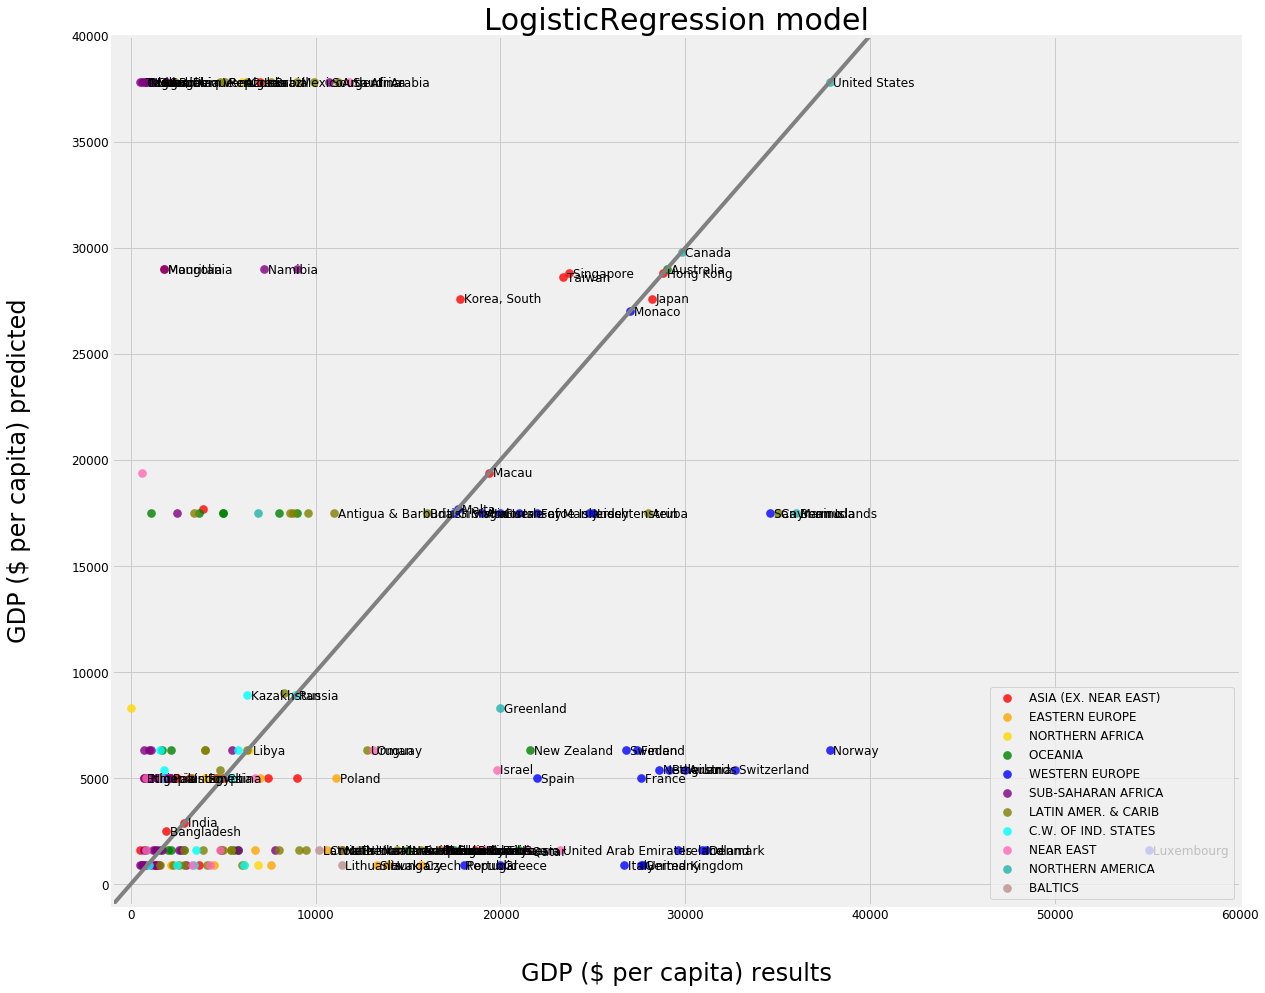

In [170]:
plt.figure(figsize=(18,16))

train_test_Y = train_Y.append(test_Y)
train_test_pred_Y = train_pred_Y.append(test_pred_Y)

data_shuffle = df1.loc[train_test_Y.index]
label = data_shuffle['country']

colors = {'ASIA (EX. NEAR EAST)         ':'red',
          'EASTERN EUROPE                     ':'orange',
          'NORTHERN AFRICA                    ':'gold',
          'OCEANIA                            ':'green',
          'WESTERN EUROPE                     ':'blue',
          'SUB-SAHARAN AFRICA                 ':'purple',
          'LATIN AMER. & CARIB    ':'olive',
          'C.W. OF IND. STATES ':'cyan',
          'NEAR EAST                          ':'hotpink',
          'NORTHERN AMERICA                   ':'lightseagreen',
          'BALTICS                            ':'rosybrown'}

for region, color in colors.items():
    X = train_test_Y.loc[data_shuffle['region']==region]
    Y = train_test_pred_Y.loc[data_shuffle['region'] == region]
    ax = sns.regplot(x=X,y=Y,marker='.',fit_reg=False,color=color,scatter_kws={'s':300,'linewidths':0},label=region)

plt.legend(loc=4,prop={'size':12})

ax.set_title('LogisticRegression model',fontsize=30)
ax.set_xlabel('GDP ($ per capita) results',labelpad=40)
ax.set_ylabel('GDP ($ per capita) predicted', labelpad=40)
ax.xaxis.label.set_fontsize(24)
ax.yaxis.label.set_fontsize(24)
ax.tick_params(labelsize=12)

x = np.linspace(-1000,50000,100)
y = x
plt.plot(x,y,c='gray')

plt.xlim(-1000,60000)
plt.ylim(-1000,40000)

for i in range(0,train_test_Y.shape[0]):
    if((data_shuffle['area'].iloc[i]>8e5) |
       (data_shuffle['population'].iloc[i]>1e8) |
       (data_shuffle['gdp_capita'].iloc[i] >10000)):
        plt.text(train_test_Y.iloc[i]+200, train_test_pred_Y.iloc[i]-200,label.iloc[i],size='large')

In [160]:
model = RandomForestRegressor(n_estimators = 50,
                             max_depth = 6,
                             min_weight_fraction_leaf = 0.05,
                             max_features = 0.8,
                             random_state = 42)
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 2690.4735164751223 msle_train: 0.15275899519020092
rmse_test: 5446.300795764445 msle_test: 1.614822122023132


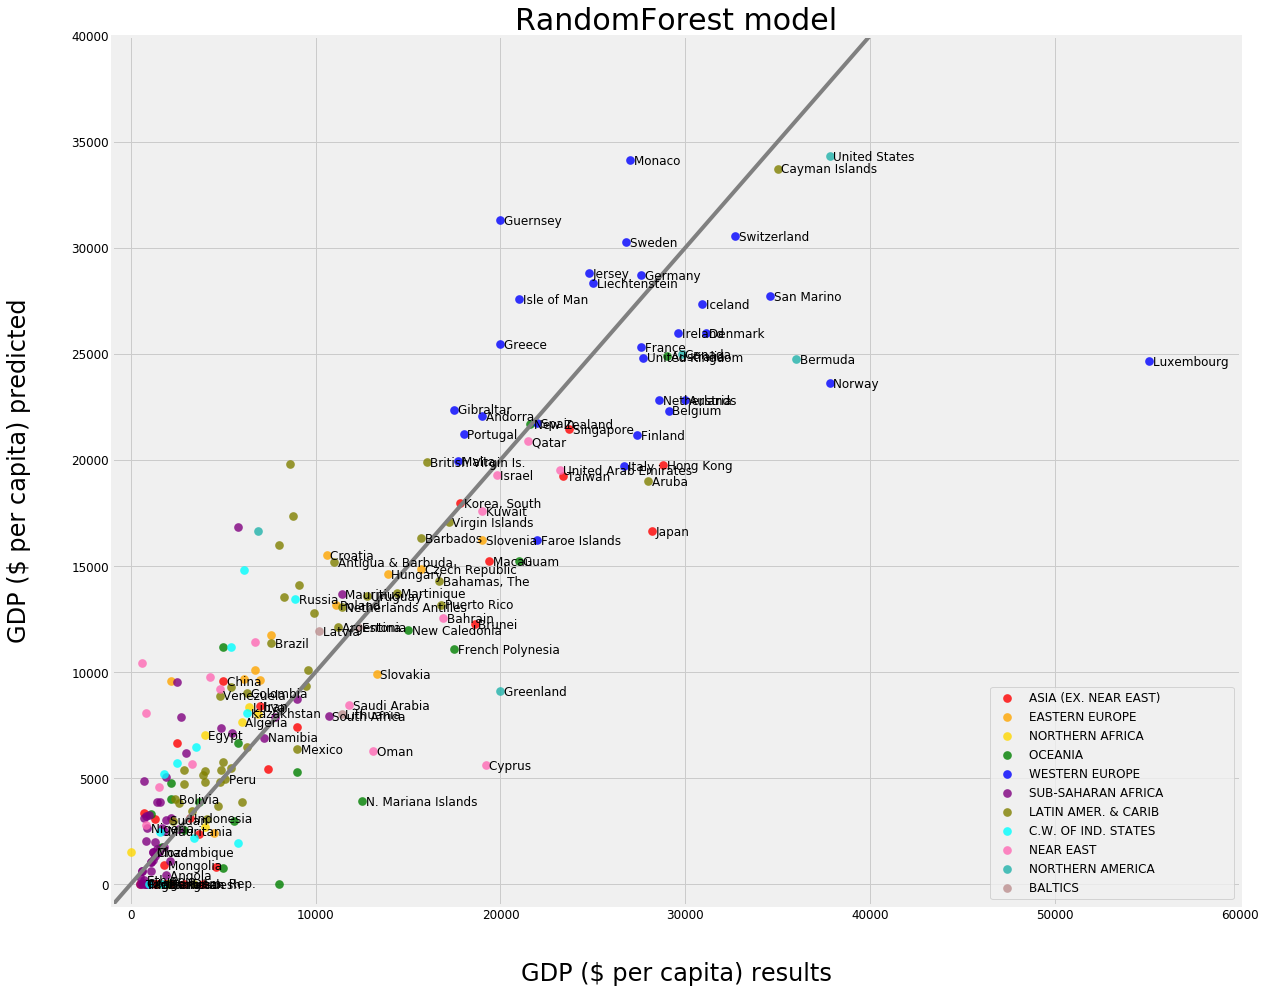

In [167]:
plt.figure(figsize=(18,16))

train_test_Y = train_Y.append(test_Y)
train_test_pred_Y = train_pred_Y.append(test_pred_Y)

data_shuffle = df1.loc[train_test_Y.index]
label = data_shuffle['country']

colors = {'ASIA (EX. NEAR EAST)         ':'red',
          'EASTERN EUROPE                     ':'orange',
          'NORTHERN AFRICA                    ':'gold',
          'OCEANIA                            ':'green',
          'WESTERN EUROPE                     ':'blue',
          'SUB-SAHARAN AFRICA                 ':'purple',
          'LATIN AMER. & CARIB    ':'olive',
          'C.W. OF IND. STATES ':'cyan',
          'NEAR EAST                          ':'hotpink',
          'NORTHERN AMERICA                   ':'lightseagreen',
          'BALTICS                            ':'rosybrown'}

for region, color in colors.items():
    X = train_test_Y.loc[data_shuffle['region']==region]
    Y = train_test_pred_Y.loc[data_shuffle['region'] == region]
    ax = sns.regplot(x=X,y=Y,marker='.',fit_reg=False,color=color,scatter_kws={'s':300,'linewidths':0},label=region)

plt.legend(loc=4,prop={'size':12})

ax.set_title('RandomForest model',fontsize=30)
ax.set_xlabel('GDP ($ per capita) results',labelpad=40)
ax.set_ylabel('GDP ($ per capita) predicted', labelpad=40)
ax.xaxis.label.set_fontsize(24)
ax.yaxis.label.set_fontsize(24)
ax.tick_params(labelsize=12)

x = np.linspace(-1000,50000,100)
y = x
plt.plot(x,y,c='gray')

plt.xlim(-1000,60000)
plt.ylim(-1000,40000)


for i in range(0,train_test_Y.shape[0]):
    if((data_shuffle['area'].iloc[i]>8e5) |
       (data_shuffle['population'].iloc[i]>1e8) |
       (data_shuffle['gdp_capita'].iloc[i] >10000)):
        plt.text(train_test_Y.iloc[i]+200, train_test_pred_Y.iloc[i]-200,label.iloc[i],size='large')